# **Crop Recommendation (Model Training)**
#### **Objective** : To train a Machine learning model to predict crop labels based on given features or variables.
#### **Problem Type** : Multiclass Classification (predict crop to grow based on given features)
#### The dataset consists of about 2200 samples and 7 Independent features to predict 22 different classes of crops.
#### **Dataset Link** - https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

## **Exploratory Data Analysis**

In [4]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading the downloaded dataset
path = r"Expanded_Crop_recommendation.csv"
df = pd.read_csv(path)
df.sample(15)

,N,P,K,temperature,humidity,ph,rainfall,label
4046,106.550798,8.491412,41.583553,29.257522,94.460330,6.527739,20.571158,muskmelon
4407,53.834452,63.885892,76.051891,18.457216,15.225240,7.580332,83.424288,chickpea
3283,102.652044,21.624068,31.377291,26.798850,57.362039,6.392661,131.103886,coffee
1760,49.000000,55.000000,51.000000,24.872121,93.905601,6.676579,135.169452,papaya
2603,20.164147,120.752076,201.906651,35.733083,80.291292,6.015023,68.421025,grapes
6029,-0.934510,22.696129,44.477075,23.095166,87.222601,7.265643,109.818404,pomegranate
4753,23.272495,58.461035,76.223881,18.896083,16.501459,6.703556,70.428644,chickpea
6195,81.793001,22.571363,48.183706,26.539120,90.158913,6.470137,59.249133,watermelon
2718,3.895869,42.595014,15.825668,26.352412,64.580644,4.028384,74.825498,mothbeans
2359,-1.121864,34.274027,31.291541,28.533616,51.597262,6.267492,87.962073,mango


In [6]:
print("SHAPE : ", df.shape)
df.info()

SHAPE :  (7000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            7000 non-null   float64
 1   P            7000 non-null   float64
 2   K            7000 non-null   float64
 3   temperature  7000 non-null   float64
 4   humidity     7000 non-null   float64
 5   ph           7000 non-null   float64
 6   rainfall     7000 non-null   float64
 7   label        7000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 437.6+ KB


In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,50.545814,53.930239,48.856250,25.603516,71.813193,6.478028,104.173868
std,36.853702,33.513211,51.735192,5.175341,22.000838,0.781824,55.559373
min,-4.726487,0.013823,0.102980,8.825675,12.820161,3.340352,15.544246
25%,20.868484,28.991013,20.484696,22.648263,60.515744,5.975455,64.847203
50%,37.000000,51.525588,32.000000,25.563888,80.452394,6.426178,95.018024
75%,84.004134,68.000000,48.893536,28.580032,89.739873,6.934234,126.615686
max,144.779258,149.538251,209.847772,44.448727,101.594216,9.935091,301.232603


In [8]:
# Printing number of samples per each class/crop
df["label"].value_counts()

label
rice           340
grapes         340
papaya         336
coconut        334
maize          334
apple          330
jute           329
blackgram      325
cotton         324
lentil         323
mothbeans      315
pomegranate    314
banana         312
mango          309
muskmelon      307
orange         307
mungbean       307
kidneybeans    306
pigeonpeas     305
coffee         305
chickpea       303
watermelon     295
Name: count, dtype: int64

## **Analyze Numerical Variables**

In [9]:
# list of all numerical variables in dataset
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

# list of all discrete variables in dataset
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]

# list of all continuous variables in dataset
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]

print("Discrete Variables : ",discrete_features)
print("Continuous Variables : ",continuous_features)

Discrete Variables :  []
Continuous Variables :  ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


In [1]:
# Plotting Scatterplots of each continuous feature against TARGET_FEATURE
for feature1 in continuous_features:
    for feature2 in continuous_features:
            data=df.copy()
            plt.figure(figsize=(10,6))  # specify figure size
            plt.scatter(df[feature1], df[feature2], s=50, 
                        marker='o',  # use circle markers
                        c='b',       # set marker color to blue
                        alpha=0.5,   # set transparency level
                        edgecolors='none')  # remove marker borders
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.show()

NameError: name 'continuous_features' is not defined

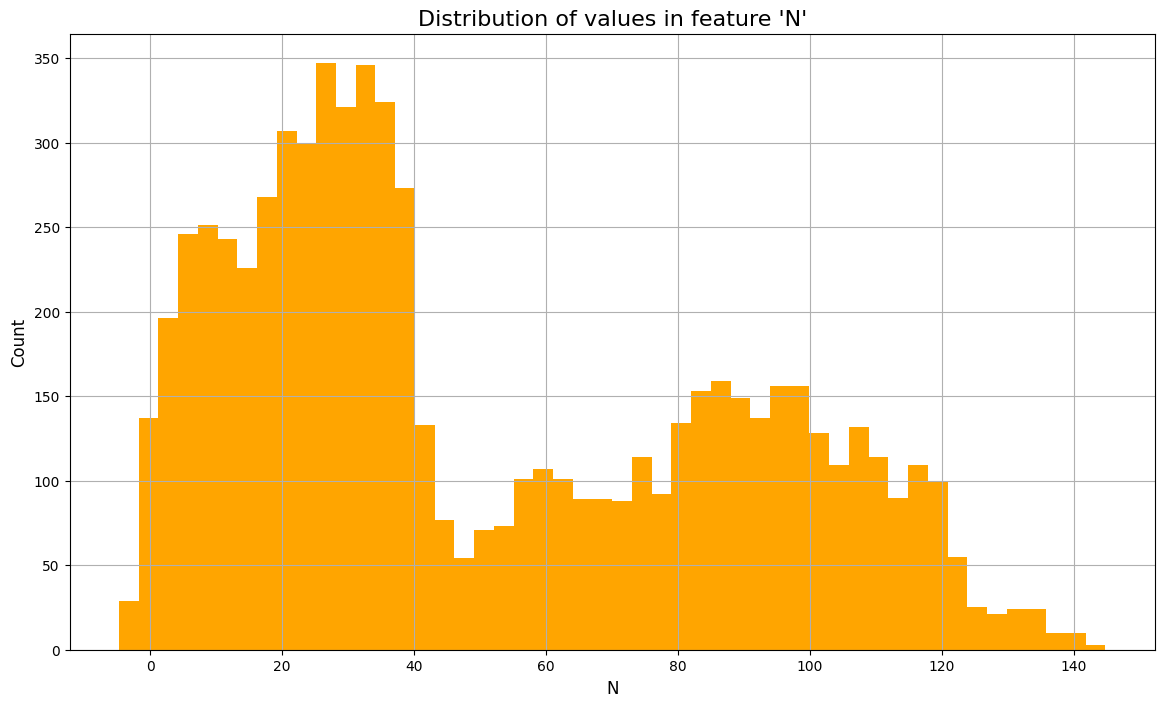

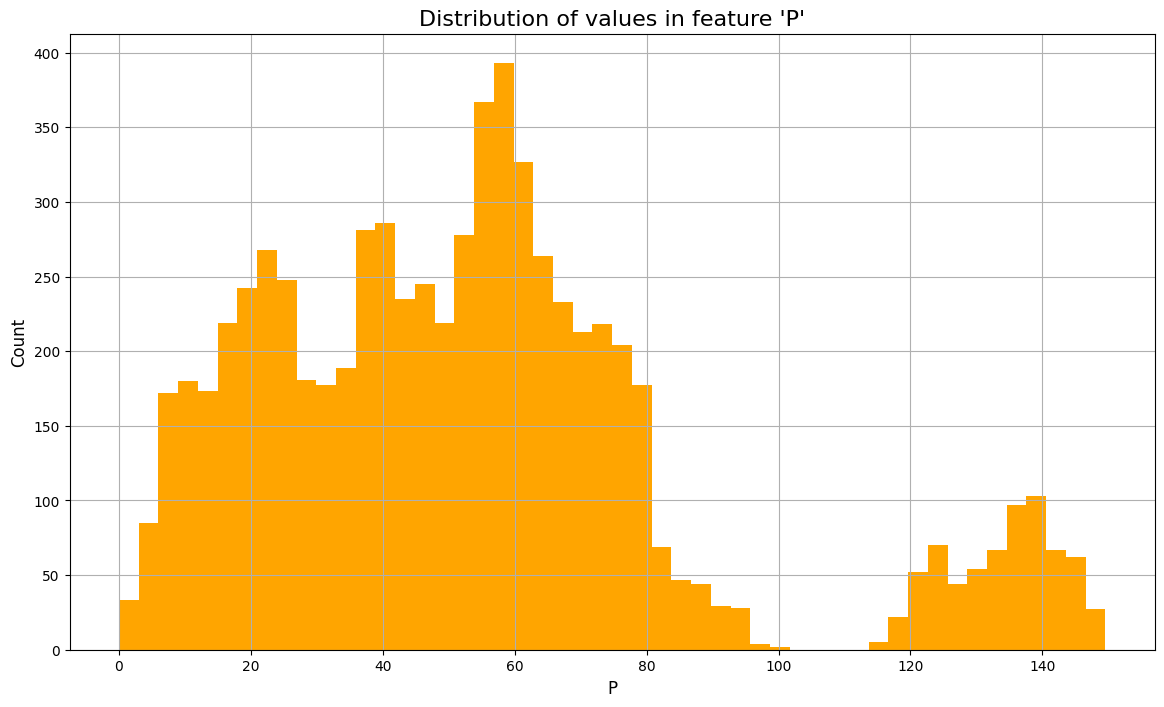

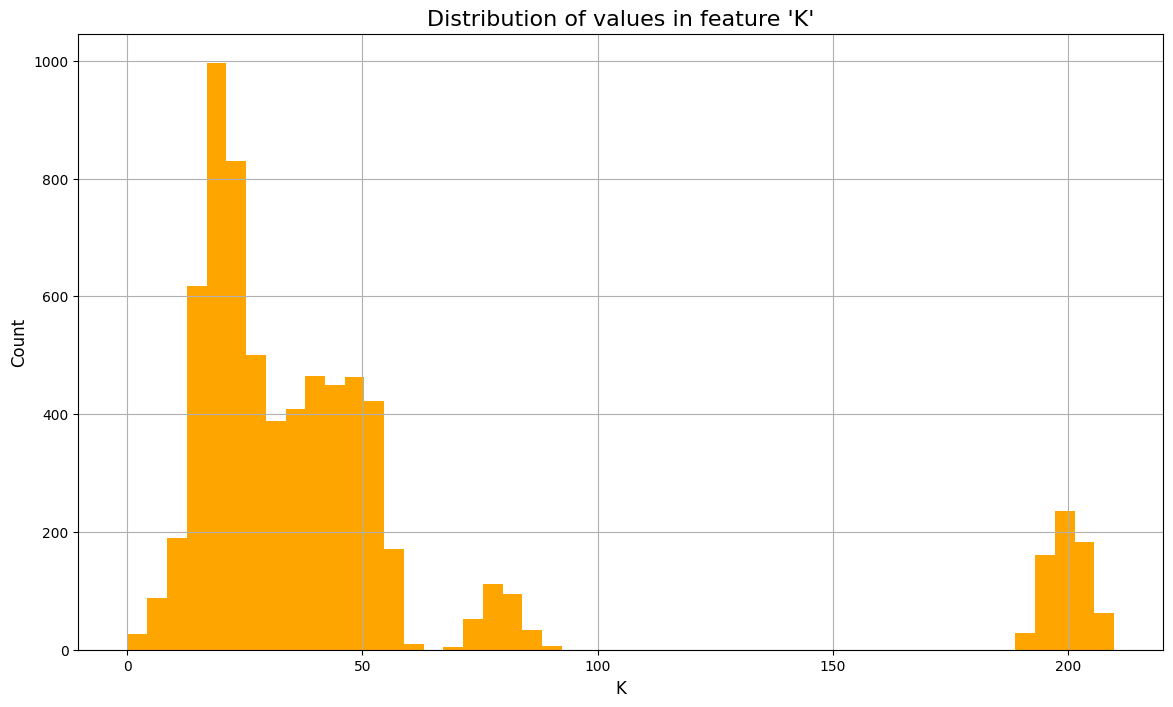

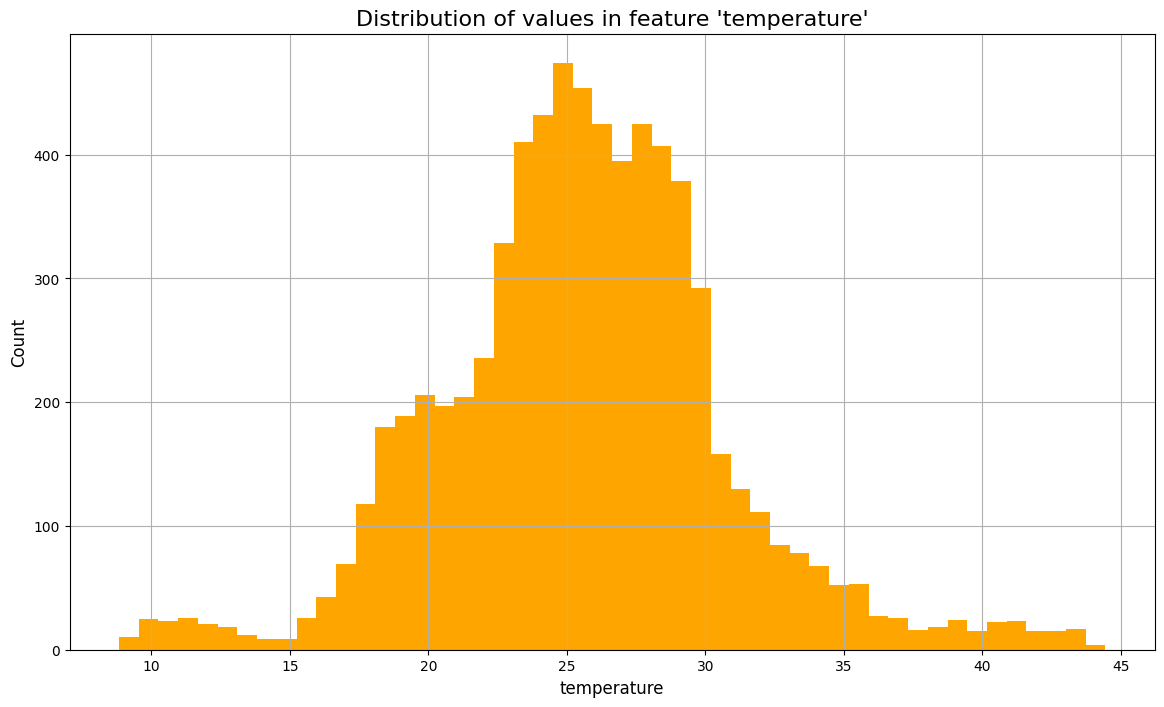

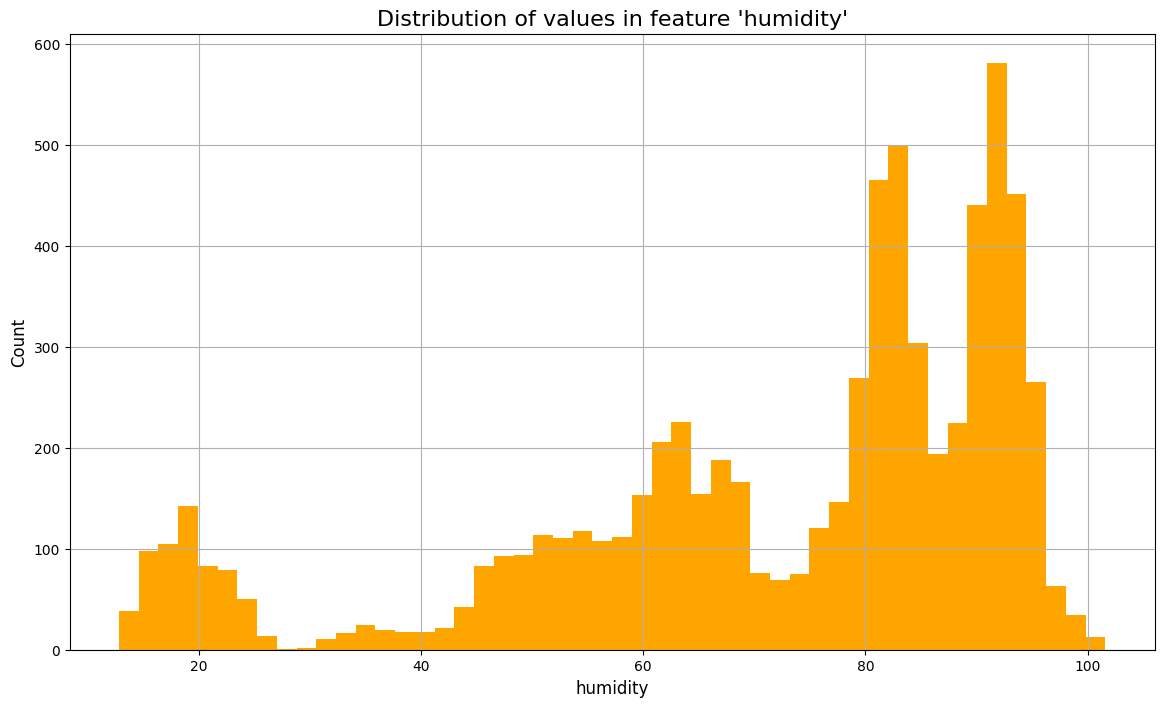

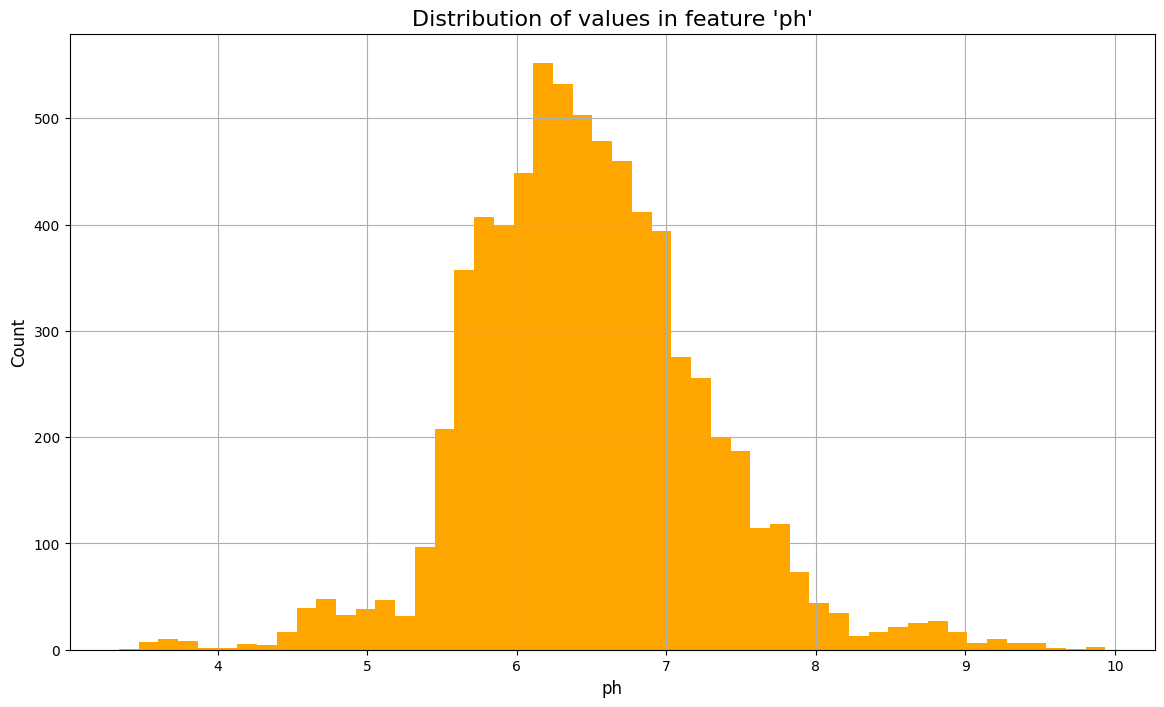

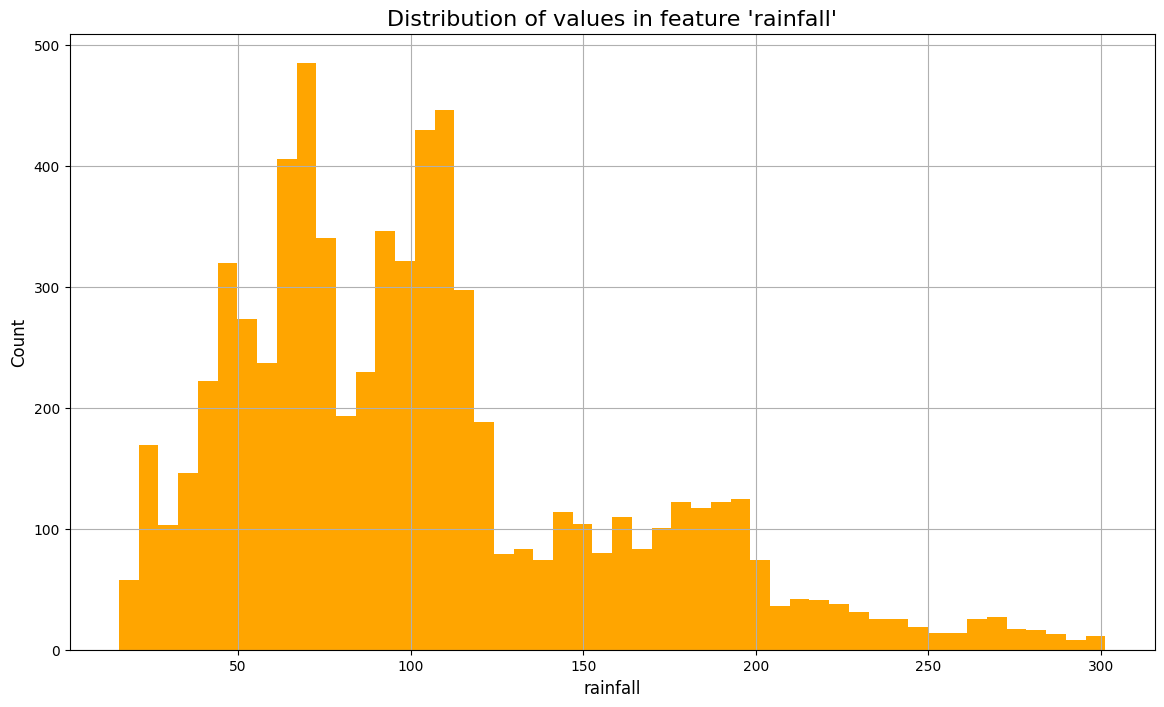

In [11]:
# Find the Distribution of values in each Continuous feature (create histograms)
for feature in continuous_features:
  # Set the figure size
  plt.subplots(figsize=(14, 8))

  # Increase the number of bins
  data[feature].hist(bins=50, color='orange')

  # Add a title
  plt.title("Distribution of values in feature '" + feature + "'", fontsize=16)

  # Adjust the axes labels
  plt.xlabel(feature, fontsize=12)
  plt.ylabel("Count", fontsize=12)

  plt.show()

## **Model Training**

In [12]:
x = df.drop("label", axis=1)
y = df["label"]

print(x.shape)
x.sample(10)

(7000, 7)


,N,P,K,temperature,humidity,ph,rainfall
1615,9.000000,11.000000,8.000000,24.859034,94.390005,6.559237,111.780373
1378,111.000000,5.000000,55.000000,26.283443,84.424789,6.520663,50.786697
858,26.000000,68.000000,24.000000,28.048496,64.076919,7.504931,37.158250
1771,67.000000,68.000000,49.000000,35.268248,92.382830,6.821775,149.848821
6440,23.377098,120.937792,192.892421,20.588184,82.728844,6.008861,70.588760
1476,80.000000,18.000000,52.000000,27.873174,91.148496,6.484800,24.052079
4455,26.846392,58.114186,27.745025,20.025168,20.038435,5.737790,145.062955
1061,95.000000,74.000000,50.000000,25.901131,80.471527,6.002482,110.103230
5354,88.703105,24.554041,44.220929,28.849293,92.669547,6.629502,20.440918
3987,21.549077,39.449785,21.424226,30.538243,57.048110,5.641138,63.595591


In [13]:
print(y.shape)
y.sample(10)

(7000,)


2248         grapes
5680    pomegranate
6085        coconut
6960      muskmelon
1795         papaya
5849         banana
451      pigeonpeas
6676     pigeonpeas
4780          mango
5143       chickpea
Name: label, dtype: object

In [14]:
# DATA SPLITTING 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,shuffle=True)

## **LightGBM Classifier Model**

In [15]:
# Creating a lightgbm model
import lightgbm as lgb

model = lgb.LGBMClassifier()

# Training the model using Training Data
model.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 7
[LightGBM] [Info] Start training from score -3.077562
[LightGBM] [Info] Start training from score -3.089258
[LightGBM] [Info] Start training from score -3.035810
[LightGBM] [Info] Start training from score -3.162462
[LightGBM] [Info] Start training from score -3.062177
[LightGBM] [Info] Start training from score -3.158251
[LightGBM] [Info] Start training from score -3.109061
[LightGBM] [Info] Start training from score -2.995732
[LightGBM] [Info] Start training from score -3.058368
[LightGBM] [Info] Start training from score -3.166690
[LightGBM] [Info] Start training from score -3.054573
[LightGBM] [Info] Start training from score -3.062177
[LightGBM] [Info] Start training from score -3.121134
[LightGBM] 

LGBMClassifier()

In [16]:
output = model.predict([[101,10,47,25.5421695,83.31883376,6.936997681,57.57343233]])
print("Predicted Crop : ",output[0])

Predicted Crop :  watermelon


In [17]:
# Save the trained model to a file
model.booster_.save_model('new_lgbm_model.txt')

### **CONCLUSION : The objective of this notebook have been achieved. We trained and saved our model which we can now use in production environment.**